In [ ]:
# importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading the dataset
dataset = pd.read_csv('UberDataset.csv')

In [3]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
dataset.shape

(1156, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Insights :
1. Start and End date should be changed to date time 
2. There is one row with null values that can be dropped 
3. Purpose has many null values that should be handled

Data Preprocessing 

In [ ]:
# dropping the na row 
dataset.drop(dataset['END_DATE'].isna().sum(), inplace= True)

In [68]:
print(dataset['END_DATE'].isna().sum())

0


In [ ]:
# Start and end date are in different formats 
# Function to identify the format and convert String type to Date type 
import pandas as pd
from datetime import datetime

def parse_mixed_date(date_str):
    if isinstance(date_str, datetime):
        return date_str
    if not isinstance(date_str, str):
        return pd.NaT
    for fmt in ("%d-%m-%Y %H:%M", "%m/%d/%Y %H:%M"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT  # if none of the formats match

dataset['START_DATE'] = dataset['START_DATE'].apply(parse_mixed_date)
dataset['END_DATE'] = dataset['END_DATE'].apply(parse_mixed_date)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [ ]:
# Extracting date and time from start date
from datetime import datetime

dataset['S_date'] = pd.DatetimeIndex(dataset['START_DATE']).date 
dataset['S_time'] = pd.DatetimeIndex(dataset['START_DATE']).hour 

In [15]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,S_date,S_time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20.0
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17.0
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14.0
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-06-01,17.0


In [ ]:
# conversion to categories for further analysis
dataset['Day-night'] = pd.cut(x = dataset['S_time'], bins =[0,10,15,19,24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])

In [17]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,S_date,S_time,Day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20.0,Night
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17.0,Evening
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14.0,Afternoon
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-06-01,17.0,Evening


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
 7   S_date      1154 non-null   object        
 8   S_time      1154 non-null   float64       
 9   Day-night   1135 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 91.6+ KB


In [ ]:
# handling missing values in Purpose
dataset['PURPOSE'].fillna('NOT', inplace= True)
# dataset.fillna({'PURPOSE': 'NOT'}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13708\1431887281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna('NOT', inplace= True)


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
 7   S_date      1154 non-null   object        
 8   S_time      1154 non-null   float64       
 9   Day-night   1135 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 91.6+ KB


In [21]:
dataset.isna().sum()

START_DATE     1
END_DATE       1
CATEGORY       1
START          1
STOP           1
MILES          0
PURPOSE        0
S_date         1
S_time         1
Day-night     20
dtype: int64

In [ ]:
# dropping null values that generated during preprocessing 
dataset.dropna(inplace= True)

In [23]:
dataset.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
S_date        0
S_time        0
Day-night     0
dtype: int64

In [28]:
dataset.shape

(1135, 10)

DATA VISUALIZATION

<Axes: xlabel='count', ylabel='PURPOSE'>

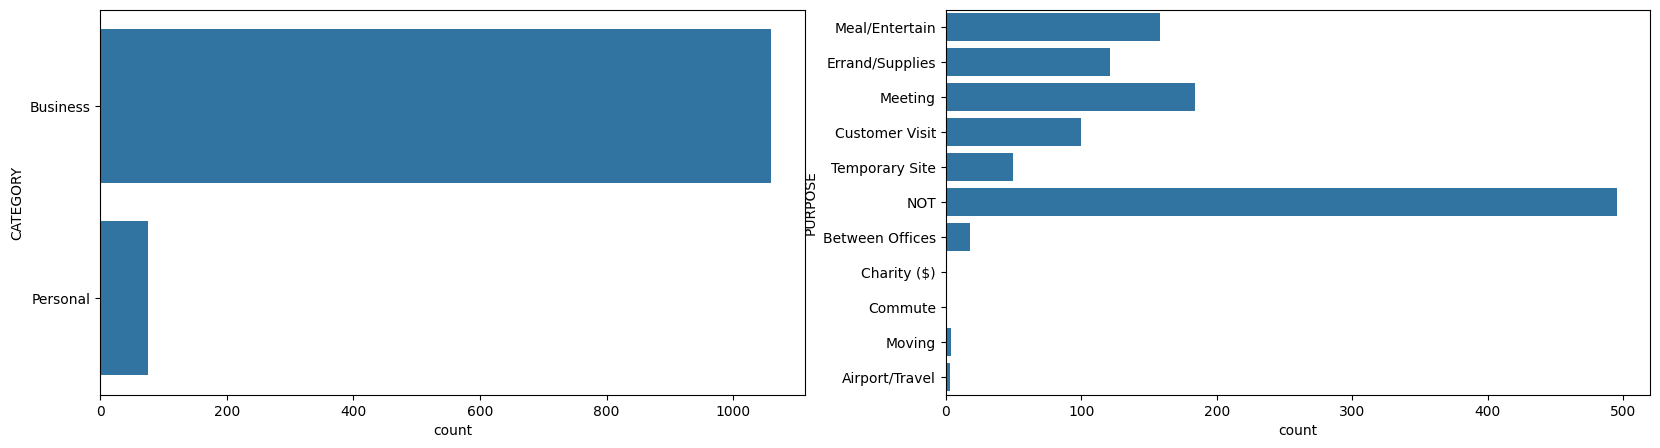

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])


Insight : 
1. People used Uber rides for business purposes more than the Personal use.
2. Though most of the people did not disclose their purpose of booking the ride yet most of the rides were booked for attending Meetings.

<Axes: xlabel='count', ylabel='Day-night'>

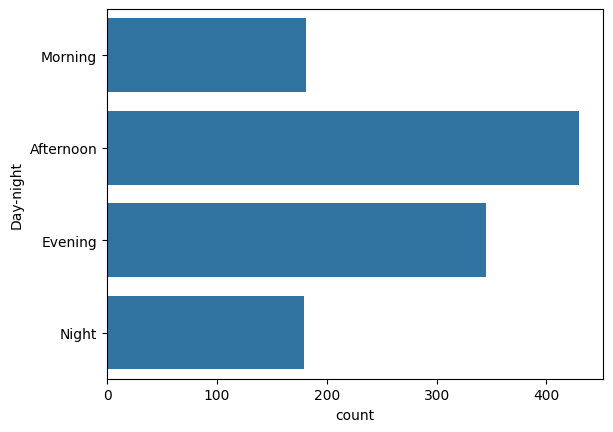

In [37]:
sns.countplot(dataset['Day-night'])

3. Most of the uber rides are booked between 10:00 AM - 3:00 PM (Afternoon hours).

In [42]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month

month_label = {
    1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'Apr', 5.0:'May',
    6.0:'Jun', 7.0:'Jul', 8.0:'Aug', 9.0:'Sep', 10.0:'Oct',
    11.0:'Nov',12.0:'Dec'
}
dataset['MONTH'] = dataset['MONTH'].map(month_label)

mon = dataset['MONTH'].value_counts(sort=False)

In [43]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,S_date,S_time,Day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20.0,Night,Feb
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17.0,Evening,May
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14.0,Afternoon,Jun
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-06-01,17.0,Evening,Jun


In [49]:
df = pd.DataFrame({
    'MONTHS': mon.values,
    'VALUE_COUNT': dataset.groupby('MONTH', sort =False)['MILES'].max()
})

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

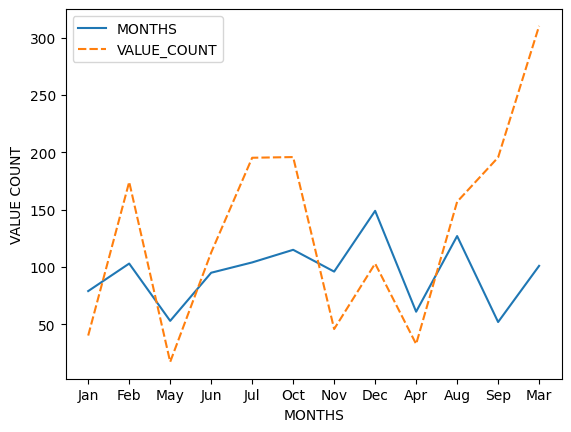

In [70]:
p =sns.lineplot(data= df)
p.set(xlabel= 'MONTHS', ylabel ='VALUE COUNT')

4. Uber rides are less booked in winters (Nov , Dec, Jan) beacuse people prefer to travel less in these months.

In [53]:
dataset['Day'] = dataset.START_DATE.dt.weekday
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,S_date,S_time,Day-night,MONTH,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,4
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20.0,Night,Feb,0
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17.0,Evening,May,6
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14.0,Afternoon,Jun,2
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-06-01,17.0,Evening,Jun,2


In [55]:
day_label = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

dataset['Day'] = dataset['Day'].map(day_label)
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,S_date,S_time,Day-night,MONTH,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20.0,Night,Feb,Mon
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17.0,Evening,May,Sun
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14.0,Afternoon,Jun,Wed
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-06-01,17.0,Evening,Jun,Wed


Text(0, 0.5, 'COUNT')

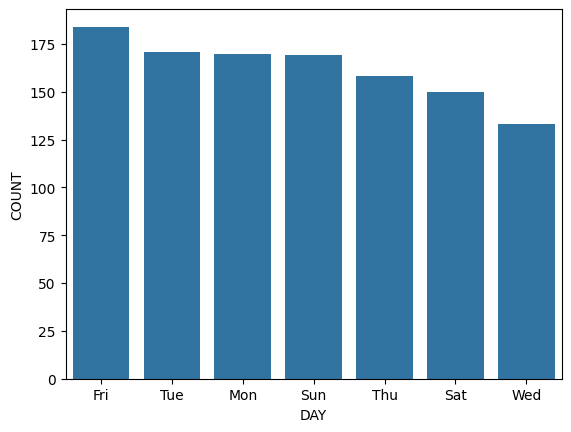

In [57]:
day_label =dataset.Day.value_counts()
sns.barplot(x= day_label.index, y =day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

5. If we compare the week days, highest number of rides are booked on Friday 

In [58]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,S_date,S_time,Day-night,MONTH,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20.0,Night,Feb,Mon
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17.0,Evening,May,Sun
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14.0,Afternoon,Jun,Wed
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-06-01,17.0,Evening,Jun,Wed


<Axes: ylabel='MILES'>

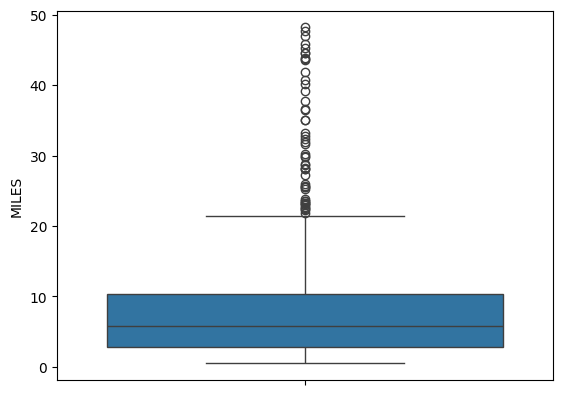

In [65]:
sns.boxplot(dataset[dataset['MILES']<50]['MILES'])

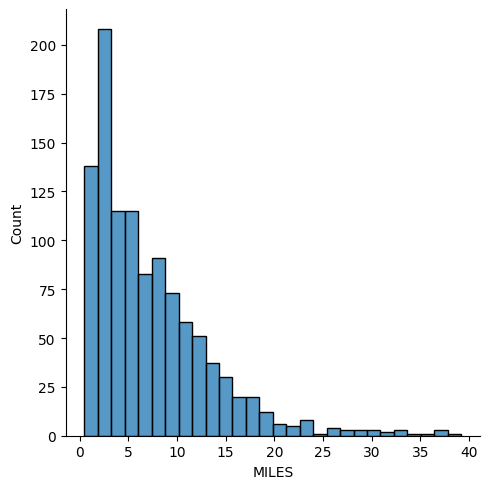

In [67]:
sns.displot(dataset[dataset['MILES']<40]['MILES'])

6. Usually people book most of the rides  for 1 - 25 Miles and then it gradually decreases.